In [2]:
from selenium.webdriver import Chrome 
from bs4 import BeautifulSoup
import pymongo
import datetime
import time 
import pandas as pd
import re

In [3]:
mc = pymongo.MongoClient()

In [4]:
db = mc['chordify']

In [5]:
raw_html = db['raw_html']

In [6]:
raw_html.find().count()

920

In [7]:
len(list(raw_html.find()))

920

In [8]:
html_docs = list(raw_html.find())

[{'_id': ObjectId('5af47e3086b136b3a2705075'),
  'datetime': datetime.datetime(2018, 5, 10, 10, 15, 28, 993000),
  'html': '<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#"><script async="" type="text/javascript" src="//www.googletagservices.com/tag/js/gpt.js"></script><script src="https://pagead2.googlesyndication.com/pagead/osd.js"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_203.js"></script><script type="text/javascript" async="" src="//www.googletagservices.com/tag/js/gpt.js"></script>\n    <meta property="fb:app_id" content="539490962762175" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Bob Dylan - John Wesley Harding (Chords)" />\n<meta property="og:description" content="ALBUM CHORDS by Bob Dylan" />\n<meta property="og:image" content="https://tabs.ultimate-guitar.com/static/_img/ug-l
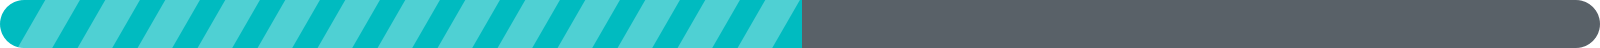
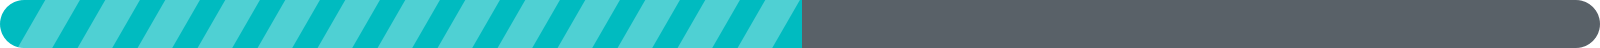
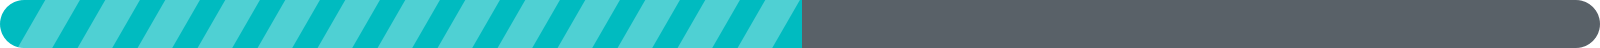
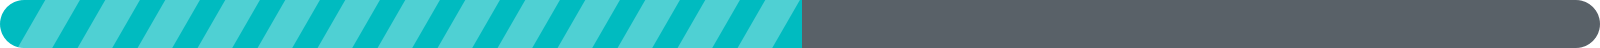

In [21]:
some_docs = html_docs[101:105]
some_docs

In [34]:
def get_lines_from_song(html_doc):
    html = html_doc['html']
    soup = BeautifulSoup(html, 'html.parser')
    song_body = soup.select_one('pre._1YgOS')
    lines = str(song_body).split('\n')
    return lines


def strip_html(text):
    result = []
    in_tag = False
    for char in text:
        if char == '<':
            in_tag = True
        if not in_tag:
            result.append(char)
        if char == '>':
            in_tag = False
    return ''.join(result)


def parse_lines(html_doc):
    lines = get_lines_from_song(html_doc)
    parsed_lines = []
    for i, line in enumerate(lines): 
        if '_3L0Da' in line:
            parsed_lines.append({'chords': strip_html(line)})
        elif (('_3L0Da' in lines[i-1]) and (line == line) and (strip_html(line) == line)):
            parsed_lines[-1]['words'] = line
    return parsed_lines

In [38]:
parsed_lines = parse_lines(doc)
parsed_lines

[{'chords': 'C F C F C  F C F C', 'words': ''},
 {'chords': '       C          F   C', 'words': "Oh, my name it is nothin'"},
 {'chords': '   F            C', 'words': 'My age it means less'},
 {'chords': '              F    C', 'words': 'The country I come from'},
 {'chords': '   F             C', 'words': 'Is called the Midwest'},
 {'chords': '                       F  C',
  'words': "I's taught and brought up there"},
 {'chords': '    F        C', 'words': 'The laws to abide'},
 {'chords': '                     F    C',
  'words': 'And that land that I live in'},
 {'chords': '    F          C', 'words': 'Has God on its side.'},
 {'chords': '        C             F    C',
  'words': 'Oh, the history books tell it'},
 {'chords': '     F          C   ', 'words': 'They tell it so well'},
 {'chords': '              F   C', 'words': 'The cavalries charged'},
 {'chords': '    F       C', 'words': 'The Indians fell'},
 {'chords': '              F   C    ', 'words': 'The cavalries charged'},

In [36]:
doc = html_docs[888] 

In [72]:
html = doc['html']

In [73]:
soup = BeautifulSoup(html, 'html.parser')

In [74]:
song_body = soup.select_one('pre._1YgOS')
song_body

<pre class="_1YgOS" style='font-size: 13px; font-family: "Roboto Mono", monospace;'>#-------------------------------PLEASE NOTE-------------------------------------#
# This file is the author's own work and represents their interpretation of the #
# song. You may only use this file for private study, scholarship, or research. #
#------------------------------------------------------------------#
With God On Our Side chords
Bob Dylan

<span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span>  <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style

In [75]:
lines = str(song_body).split('\n')
lines

['<pre class="_1YgOS" style=\'font-size: 13px; font-family: "Roboto Mono", monospace;\'>#-------------------------------PLEASE NOTE-------------------------------------#',
 "# This file is the author's own work and represents their interpretation of the #",
 '# song. You may only use this file for private study, scholarship, or research. #',
 '#------------------------------------------------------------------#',
 'With God On Our Side chords',
 'Bob Dylan',
 '',
 '<span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span>  <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">C</span> <span class="_3L0Da _3f5kI" style="color: rgb(0, 0, 0);">F</span> <

In [76]:
def strip_html(text):
    result = []
    in_tag = False
    for char in text:
        if char == '<':
            in_tag = True
        if not in_tag:
            result.append(char)
        if char == '>':
            in_tag = False
    return ''.join(result)

In [77]:
# def parse_lines(lines):
#     parsed_lines = []
#     for line in lines: 
#         if '_3L0Da' in line:
#             parsed_lines.append({'chords': strip_html(line)})
#         elif line and strip_html(line) == line:
#             parsed_lines[-1]['words'] = line
#     return parsed_lines 

In [78]:
def parse_lines(lines):
    parsed_lines = []
    for i, line in enumerate(lines): 
        if '_3L0Da' in line:
            parsed_lines.append({'chords': strip_html(line)})
        elif (('_3L0Da' in lines[i-1]) and (line == line) and (strip_html(line) == line)):
            parsed_lines[-1]['words'] = line
    return parsed_lines 

In [79]:
parsed_lines = parse_lines(lines)
parsed_lines

[{'chords': 'C F C F C  F C F C', 'words': ''},
 {'chords': '       C          F   C', 'words': "Oh, my name it is nothin'"},
 {'chords': '   F            C', 'words': 'My age it means less'},
 {'chords': '              F    C', 'words': 'The country I come from'},
 {'chords': '   F             C', 'words': 'Is called the Midwest'},
 {'chords': '                       F  C',
  'words': "I's taught and brought up there"},
 {'chords': '    F        C', 'words': 'The laws to abide'},
 {'chords': '                     F    C',
  'words': 'And that land that I live in'},
 {'chords': '    F          C', 'words': 'Has God on its side.'},
 {'chords': '        C             F    C',
  'words': 'Oh, the history books tell it'},
 {'chords': '     F          C   ', 'words': 'They tell it so well'},
 {'chords': '              F   C', 'words': 'The cavalries charged'},
 {'chords': '    F       C', 'words': 'The Indians fell'},
 {'chords': '              F   C    ', 'words': 'The cavalries charged'},

In [80]:
type(parsed_lines[0])

dict

In [29]:
def get_chords(parsed_line):
    chord_idxs = []
    chords = []
    c_string = parsed_line['chords']
    for chord in re.finditer('\w+', c_string):
        chord_idxs.append(chord.start())
        chords.append(chord.group())
    chord_tups = list(zip(chord_idxs, chords))
    return chord_idxs, chords, chord_tups

def get_words(parsed_line):
    word_idxs = []
    words = []
    if 'words'in parsed_line: 
        w_string = parsed_line['words']
        for word in re.finditer('\w+', w_string):
            word_idxs.append(word.start())
            words.append(word.group())
    word_tups = list(zip(word_idxs, words))
    return word_idxs, words, word_tups

In [30]:
def merge_chord_word(parsed_line):
    chord_tups = get_chords(parsed_line)[2]
    word_tups = get_words(parsed_line)[2]
    word_list = get_words(parsed_line)[1]
    chord_idx_list = []
    for chord_tup in chord_tups: 
        for i, word_tup in enumerate(word_tups):
            if word_tup[0] > chord_tup[0]:
                chord_idx_list.append((i-1, chord_tup[1]))
                break 
    return (chord_idx_list, word_list)

def combine_ch_wd_lists(merged_line_1, merged_line_2):
    chord_idx_list_1, word_list_1 = merged_line_1
    chord_idx_list_2, word_list_2 = merged_line_2
    new_chord_tups = []
    for chord_idx_tup in chord_idx_list_2:
        new_chord_tups.append( ( ((chord_idx_tup)[0]+len(word_list_1)), chord_idx_tup[1] ) )
    all_chords_tups = chord_idx_list_1 + new_chord_tups 
    all_words_list = word_list_1 + word_list_2
    return all_chords_tups, all_words_list 

In [31]:
 merge_chord_word(parsed_lines[2])

([(0, 'Am')],
 ['You', 'may', 'be', 'an', 'ambassador', 'to', 'England', 'or', 'France'])

In [32]:
def parse_song(parsed_lines):
    for i, parsed_line in enumerate(parsed_lines):
        if i == 0:
            merged_line = merge_chord_word(parsed_line)
        else: 
            merged_line_next = merge_chord_word(parsed_line)
            merged_line = combine_ch_wd_lists(merged_line, merged_line_next)
    return merged_line 

In [33]:
merged_line = parse_song(parsed_lines)
merged_line

([(0, 'Am'),
  (6, 'Am7'),
  (8, 'Am'),
  (12, 'Am'),
  (21, 'Am'),
  (30, 'Am'),
  (40, 'Am'),
  (57, 'D7'),
  (58, 'G'),
  (58, 'D'),
  (58, 'D7'),
  (66, 'Am'),
  (70, 'E'),
  (75, 'D7'),
  (83, 'D7'),
  (86, 'Am'),
  (89, 'Am'),
  (101, 'Am'),
  (111, 'Am'),
  (122, 'Am'),
  (139, 'D7'),
  (149, 'Am'),
  (154, 'E'),
  (161, 'D7'),
  (168, 'D7'),
  (171, 'Am'),
  (175, 'Am'),
  (181, 'Am7'),
  (186, 'Am'),
  (196, 'Am'),
  (211, 'Am'),
  (215, 'Am7'),
  (216, 'D7'),
  (216, 'A'),
  (221, 'Am7'),
  (224, 'D7'),
  (234, 'Am'),
  (240, 'E'),
  (246, 'D7'),
  (253, 'D7'),
  (256, 'Am'),
  (261, 'Am'),
  (270, 'Am'),
  (281, 'Am'),
  (295, 'Am'),
  (309, 'D7'),
  (317, 'Am'),
  (322, 'E'),
  (328, 'D7'),
  (336, 'D7'),
  (339, 'Am'),
  (343, 'Am'),
  (352, 'Am'),
  (362, 'Am'),
  (377, 'Am7'),
  (383, 'Am'),
  (384, 'G'),
  (384, 'A'),
  (390, 'Em'),
  (390, 'A'),
  (393, 'D7'),
  (401, 'Am'),
  (406, 'E'),
  (413, 'D7'),
  (420, 'D7'),
  (423, 'Am'),
  (427, 'Am'),
  (437, 'Am'),
  (447

In [88]:
len(merged_line[1])

361

In [87]:
parsed_lines

[{'chords': 'C F C F C  F C F C', 'words': ''},
 {'chords': '       C          F   C', 'words': "Oh, my name it is nothin'"},
 {'chords': '   F            C', 'words': 'My age it means less'},
 {'chords': '              F    C', 'words': 'The country I come from'},
 {'chords': '   F             C', 'words': 'Is called the Midwest'},
 {'chords': '                       F  C',
  'words': "I's taught and brought up there"},
 {'chords': '    F        C', 'words': 'The laws to abide'},
 {'chords': '                     F    C',
  'words': 'And that land that I live in'},
 {'chords': '    F          C', 'words': 'Has God on its side.'},
 {'chords': '        C             F    C',
  'words': 'Oh, the history books tell it'},
 {'chords': '     F          C   ', 'words': 'They tell it so well'},
 {'chords': '              F   C', 'words': 'The cavalries charged'},
 {'chords': '    F       C', 'words': 'The Indians fell'},
 {'chords': '              F   C    ', 'words': 'The cavalries charged'},